> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: GDP per capita analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we analyse the influence of the different factors on the GDP per capita. 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

GDP_per_capita = pd.read_csv('GDP_per_capita.csv', sep=";")
population_growth = pd.read_csv('population_growth.csv', sep = ";")
population = pd.read_csv('population.csv', sep = ";")
growth = pd.read_csv('growth.csv', sep = ";")
school_men = pd.read_csv('school_men.csv', sep = ";")
school_women = pd.read_csv('school_women.csv', sep = ";")
life_expectancy_years = pd.read_csv('life_expectancy_years.csv', sep = ";")


Here we see a lot missing gaps in the data. However it is not going to affect the overall anakysis. 


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

We focus our analysis on the Germany case, therefore we need to make a table with all variables in one and only for Germany. 


In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
GDP_per_capita.head()
print(type(GDP_per_capita))
#GDP_per_capita[geo.name]
GDP_per_capita.shape
G_GDP_per_capita = GDP_per_capita[GDP_per_capita["geo.name"] == "Germany"]
G_GDP_per_capita


#Same pocedure with population growth variables
population_growth.columns = population_growth.iloc[2]
G_population_growth = population_growth[population_growth["Country Name"] == "Germany"]
G_population_growth

#Same pocedure with population
G_population = population[population["Total population"] == "Germany"]
G_population



<class 'pandas.core.frame.DataFrame'>


Total population        1800      1810      1820      1830      1840  \
82          Germany  22.886.919  23882461  25507768  28016571  31016143   

        1850      1860      1870      1880     ...     Unnamed: 82  \
82  33663143  36383150  39702235  43577358     ...             NaN   

   Unnamed: 83 Unnamed: 84 Unnamed: 85 Unnamed: 86 Unnamed: 87 Unnamed: 88  \
82         NaN         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 89 Unnamed: 90 Unnamed: 91  
82         NaN         NaN         NaN  

[1 rows x 92 columns]

In [4]:

#Same pocedure with schooling years for men and women
school_men.head()
G_school_men = school_men[school_men["Row Labels"] == "Germany"]
G_school_men 

school_women.head()
G_school_women = school_women[school_women["Row Labels"] == "Germany"]
G_school_women 


#Same pocedure for life expectancy
G_life_expectancy = life_expectancy_years[life_expectancy_years["Life expectancy"] == "Germany"]
G_life_expectancy



Life expectancy   1800   1801   1802   1803   1804   1805   1806   1807  \
82         Germany  38,37  38,37  38,37  38,37  38,37  38,37  38,37  38,37   

     1808  ...   2007 2008  2009  2010  2011  2012  2013  2014  2015  2016  
82  38,37  ...   79,9   80  80,1  80,3  80,5  80,6  80,7  80,7  80,8  80,9  

[1 rows x 218 columns]

In [5]:
#we need to transpose the all datasets
G_GDP_per_capita.describe()
G_GDP_per_capita = G_GDP_per_capita.T
G_population_growth = G_population_growth.T
G_population = G_population.T
G_school_men = G_school_men.T
G_school_women = G_school_women.T
G_life_expectancy = G_life_expectancy.T

In [6]:
#removing unnessessary columns, change the column name, making the year as a variable
G_GDP_per_capita = G_GDP_per_capita.drop(G_GDP_per_capita.index[0:4])
#time range 1800 - 2040 (predicted)
G_GDP_per_capita.columns = ['gdp_per_cap']

G_GDP_per_capita.index.name = 'year'
G_GDP_per_capita.reset_index(inplace=True)

In [7]:
G_population_growth = G_population_growth.drop(G_population_growth.index[0:4])
#time range 1960-2017
G_population_growth.columns = ['pop_growth']

G_population_growth.index.name = 'year'
G_population_growth.reset_index(inplace=True)

#remover the last 2018, which is NA
G_population_growth = G_population_growth[:-1]

In [8]:
G_population = G_population.drop(G_population.index[0])
#time range 1900-2015
G_population.columns = ['pop']

G_population.index.name = 'year'
G_population.reset_index(inplace=True)

#remove unnesessary bottom column:
G_population = G_population[:-10]

In [9]:
G_school_men = G_school_men.drop(G_school_men.index[0])
#time range 1970-2009
G_school_men.columns = ['school_men']

G_school_men.index.name = 'year'
G_school_men.reset_index(inplace=True)

In [10]:
G_school_women = G_school_women.drop(G_school_women.index[0])
#time range 1970-2009
G_school_women.columns = ['school_women']

G_school_women.index.name = 'year'
G_school_women.reset_index(inplace=True)

In [11]:
G_life_expectancy = G_life_expectancy.drop(G_life_expectancy.index[0])
#time range 1800-2016
G_life_expectancy.columns = ['life_exp']

G_life_expectancy.index.name = 'year'
G_life_expectancy.reset_index(inplace=True)

In [12]:
#merging all datasets
G_data = pd.merge(G_GDP_per_capita, G_population_growth, how = 'outer')
G_data = pd.merge(G_data, G_population, how = 'outer')
G_data = pd.merge(G_data, G_school_men, how = 'outer')
G_data = pd.merge(G_data, G_school_women, how = 'outer')
G_data = pd.merge(G_data, G_life_expectancy, how = 'outer')

G_data

year gdp_per_cap    pop_growth         pop school_men school_women  \
0    1800        1639           NaN  22.886.919        NaN          NaN   
1    1801        1650           NaN         NaN        NaN          NaN   
2    1802        1662           NaN         NaN        NaN          NaN   
3    1803        1673           NaN         NaN        NaN          NaN   
4    1804        1685           NaN         NaN        NaN          NaN   
5    1805        1697           NaN         NaN        NaN          NaN   
6    1806        1709           NaN         NaN        NaN          NaN   
7    1807        1721           NaN         NaN        NaN          NaN   
8    1808        1733           NaN         NaN        NaN          NaN   
9    1809        1746           NaN         NaN        NaN          NaN   
10   1810        1758           NaN    23882461        NaN          NaN   
11   1811        1770           NaN         NaN        NaN          NaN   
12   1812        1783           NaN         NaN        NaN          NaN   
13   1813        1795           NaN         NaN        NaN          NaN   
14   1814        1808           NaN         NaN        NaN          NaN   
15   1815        1821           NaN         NaN        NaN          NaN   
16   1816        1834           NaN         NaN        NaN          NaN   
17   1817        1846           NaN         NaN        NaN          NaN   
18   1818        1859           NaN         NaN        NaN          NaN   
19   1819        1873           NaN         NaN        NaN          NaN   
20   1820        1886           NaN    25507768        NaN          NaN   
21   1821        1899           NaN         NaN        NaN          NaN   
22   1822        1912           NaN         NaN        NaN          NaN   
23   1823        1926           NaN         NaN        NaN          NaN   
24   1824        1940           NaN         NaN        NaN          NaN   
25   1825        1953           NaN         NaN        NaN          NaN   
26   1826        1967           NaN         NaN        NaN          NaN   
27   1827        1981           NaN         NaN        NaN          NaN   
28   1828        1995           NaN         NaN        NaN          NaN   
29   1829        2009           NaN         NaN        NaN          NaN   
..    ...         ...           ...         ...        ...          ...   
211  2011       42693  -1,853714629  80.424.665        NaN          NaN   
212  2012       42822   0,187727801  80.477.952        NaN          NaN   
213  2013       42914   0,272900215  80.565.861        NaN          NaN   
214  2014       43418   0,416877359  80.646.262        NaN          NaN   
215  2015       43784   0,865702644  80.688.545        NaN          NaN   
216  2016       44072   0,807218539         NaN        NaN          NaN   
217  2017       44617   0,408591509         NaN        NaN          NaN   
218  2018       45166           NaN         NaN        NaN          NaN   
219  2019       45717           NaN         NaN        NaN          NaN   
220  2020       46287           NaN         NaN        NaN          NaN   
221  2021       46891           NaN         NaN        NaN          NaN   
222  2022       47555           NaN         NaN        NaN          NaN   
223  2023       48296           NaN         NaN        NaN          NaN   
224  2024       49125           NaN         NaN        NaN          NaN   
225  2025       50042           NaN         NaN        NaN          NaN   
226  2026       51039           NaN         NaN        NaN          NaN   
227  2027       52104           NaN         NaN        NaN          NaN   
228  2028       53223           NaN         NaN        NaN          NaN   
229  2029       54386           NaN         NaN        NaN          NaN   
230  2030       55584           NaN         NaN        NaN          NaN   
231  2031       56813           NaN         NaN        NaN          NaN   
232  2032       58071         

Now we have all nesessary veriables in one dataframe. We can moove to the exploration of research questions.

In [19]:
G_data.describe()
G_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 240
Data columns (total 7 columns):
year            241 non-null object
gdp_per_cap     241 non-null object
pop_growth      58 non-null object
pop             81 non-null object
school_men      40 non-null object
school_women    40 non-null object
life_exp        217 non-null object
dtypes: object(7)
memory usage: 15.1+ KB


There a lot of missing values, hoverver we are not planning to focus only on present values. Therefore we will leave the data with missing values.

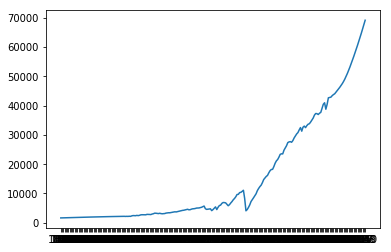

In [23]:
plt.plot('year', 'gdp_per_cap', data=G_data) 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Affect the population on GDP per capita

In [30]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

#since there is a lot of missing values we will plot with the mask:

s1mask = np.isfinite(G_data['pop'])
series2 = np.array([2, None, 5, None, 4, None, 3, 2]).astype(np.double)
s2mask = np.isfinite(series2)


plt.plot('pop', 'gdp_per_cap', 'bo', data=G_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In [ ]:
3+7